## 数据处理
进行数据格式处理

In [1]:
import re
import json

### 转换RJUA数据集

In [2]:
# 定义文件路径
file_path = 'RJUA/RJUA_train.json'

# 逐行读取 JSONL 文件
with open(file_path, 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

# 输出数据
print(len(data))

1705


In [11]:
contexts_all = []

In [24]:
for i in range(1600, 1705):
    # 提取每个 Context 后的内容
    context_text = data[i]["context"]
    contexts = re.findall(r'Context：(.*?)(?=\nContext|$)', context_text, re.S)

    # 输出提取的内容
    context_list = []
    for j, context in enumerate(contexts, 1):
        print(context.strip())
        context_list.append(context.strip())
    contexts_all.append(context_list)

肾切除及肾部分切除术 因血管重建技术及腔内技术的飞速发展，肾切除及肾部分切除已较少应用，但在如下情况仍可采用:(D患侧肾脏无功能，对侧肾脏功能良好。(2患侧肾脏内已有弥漫性动脉栓塞形成。3肾血管病变范围广，远段分支血管受累，无法进行修复性手术。D修复性手术失败且对侧肾功能正常。5)一侧肾脏行修复性手术后，肾功能恢复，但血压不下降，对侧肾脏活检出现坏死性动脉炎或肾近球体增生等继发性肾病表现，可考虑行肾脏切除。6患肾无滤过功能[GFR≤ 10ml ( min·1.73m)]但分泌大量肾素，导致严重高血压。(O患者无法耐受峰压药物、降压疗效不佳或准备妊娠不宜服用降压药。对萎缩肾不宜轻易切除。肾动脉栓塞局限于肾脏的一极或范围较小的肾动脉瘤、动静脉搂可行肾部分切除。
肾脓肿结合临床和实验室资料，诊断多无困难。CT检查可清楚显示肾轮廊、肾周围间隙及与其邻近结构的关系，可指导临床治疗。CT对临床表现不典型以及早期脓肿诊断困难，不易与肾细胞癌鉴别，需结合临床、短期随访甚至细针抽吸活检来明确诊断。总的说来，不论脓肿的位置及范围如何，均会导致病侧肾脏不同程度的功能障碍，表现为CT强化程度弱于正常肾。这是肾脏炎性病变的一个重要特征。MRI在肾脓肿检查中有一定意义，但并非常规检查。
上尿路结石包括肾结石和输尿管结石。肾结石分为肾集合管结石、肾盏(肾盏憩室)结石、肾盂结石、鹿角形结石。输尿管结石可分为输尿管上段结石、中段结石及下段结石。
所有具有泌尿系结石临床症状的患者都应该进行影像学检查，其结果对于结石的进一步诊治具有重要价值。超声波检查超声波检查可作为泌尿系结石的常规检查方法，更是儿童和孕妇在怀疑泌尿系结石时的首选方法。其优点是简便、经济、无创伤，可以发现2mm以上结石。由于受肠道内容物的影响，超声波检查诊断输尿管中下段结石的敏感性较低。
部分患者可以通过保守治疗自发性排出结石。结石自发性排出与结石的部位和大小有关[35]。49%的输尿管上段结石、58%的中段结石和68%的远端输尿管结石可自行排出。75%的<5mm的结石和62%的>5mm的结石可自行排出，排出结石的平均时间约为17天(范围6~29天)[36]。随着结石大小的增加结石自行排出的概率会逐步减少，并且个体患者之间存在差异。
促排石药物包括α受体阻滞剂、钙通道抑制剂和磷酸二酯酶V型抑制剂(PDEI-5)[37]。α受体阻滞剂的排

In [27]:
print(len(contexts_all))

count = 0
for i in contexts_all:
    count += len(i)
print(count)

1705
14791


In [26]:
with open('RJUA/contexts.json', 'w', encoding='utf-8') as f:
    json.dump(contexts_all, f, ensure_ascii=False, indent=4)

# TEST

In [ ]:
import re
import json

# 汉字数字映射表
hanzi_dict = {
    '零': 0, '一': 1, '二': 2, '三': 3, '四': 4,
    '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
    '十': 10, '百': 100, '千': 1000, '万': 10000, '亿': 100000000
}

def hanzi_to_num(hanzi):
    result = 0
    temp = 0  # 临时保存小单位组合的值
    for char in hanzi:
        value = hanzi_dict[char]
        if value >= 10:  # 遇到单位
            if temp == 0:
                temp = 1
            result += temp * value
            temp = 0
        else:  # 遇到数字
            temp = value
    return result + temp  # 加上最后未计算的数字

def extract_and_convert(text):
    # 匹配第...条的格式（支持含空格和顿号）
    match = re.search(r'第([零一二三四五六七八九十百千万亿]+)条', text)
    if match:
        hanzi_number = match.group(1)
        return hanzi_to_num(hanzi_number)
    return None

# 测试示例
test_cases = [
    "《刑法》第三百四十二条",
    "《民法典》第二百零五条",
    "《宪法》第十条",
    "《合同法》第五十条",
    "《著作权法》第一千八百九十六条"
]

# for text in test_cases:
#     print(f"{text} → {extract_and_convert(text)}")

characters = set()
with open('法律/DISC-json.json', 'r', encoding='utf-8') as f:
    examples = json.load(f)
    for example in examples:
        for ref in example["reference"]:
            characters.add(extract_and_convert(ref))

print(characters)



{114, 115, 116, 117, 118, 119, 122, 124, 125, 127, 128, 130, 132, 133, 134, 135, 136, 140, 141, 143, 144, 147, 149, 150, 151, 152, 153, 155, 156, 158, 159, 161, 162, 163, 164, 168, 170, 171, 172, 175, 176, 177, 184, 185, 186, 191, 192, 193, 194, 196, 198, 199, 200, 201, 205, 209, 210, 211, 212, 213, 214, 215, 217, 220, 223, 224, 225, 226, 227, 228, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 248, 253, 258, 260, 261, 262, 263, 264, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 279, 280, 281, 282, 283, 285, 286, 288, 290, 291, 292, 293, 294, 295, 302, 303, 305, 307, 308, 310, 312, 313, 314, 315, 316, 328, 333, 336, 338, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 356, 357, 358, 359, 360, 361, 363, 364, 367, 369, 372, 375, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 395, 396, 397, 399, 404, 413, 417, 418}


: 

In [10]:
import json
import jsonlines

datas = []
with open('法律/law_logic2predicates_v3.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)
        # 打印或处理数据
        datas.append(data)

count = -1
for idx, i in enumerate(datas):   
    if i["number"] == 0:
        count += 1
        i["id"] = count
    else:
        i["id"] = count

for i in datas:
    with jsonlines.open('法律/law_logic2predicates_v4.jsonl', mode='a') as writer:
        writer.write(i)

In [1]:
def extract_json(text):
    # 使用正则表达式匹配并提取 JSON 数据（假设 JSON 数据用 `{` 开头和 `}` 结尾）
    json_data = re.search(r'\{.*\}', text, re.DOTALL)

    # 检查是否找到匹配的 JSON 数据
    if json_data:
        json_string = json_data.group(0)

        # # 将 JSON 数据解析为字典
        # data = json.loads(json_string)
        return json_string
    else:
        print("未找到 JSON 数据。")
        return None

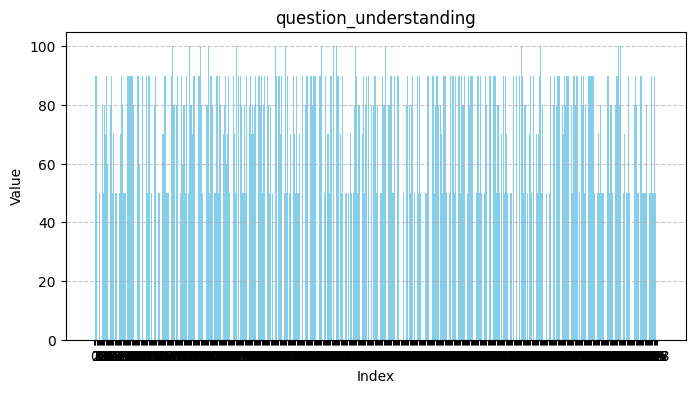

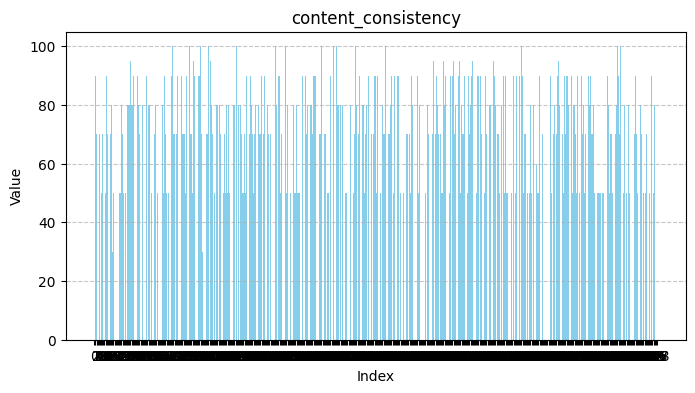

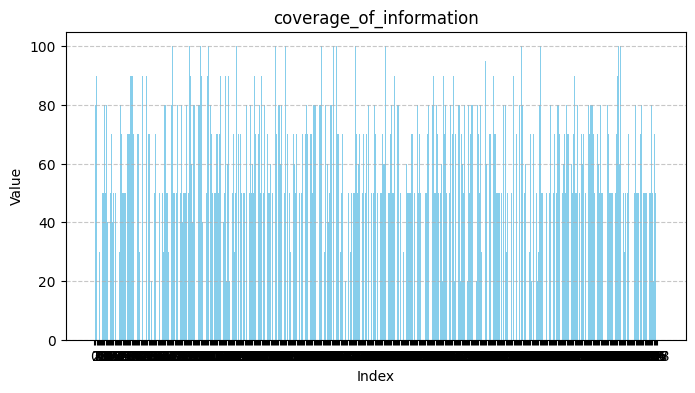

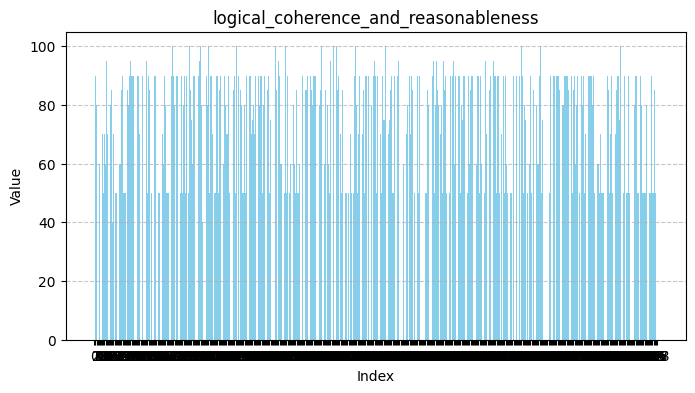

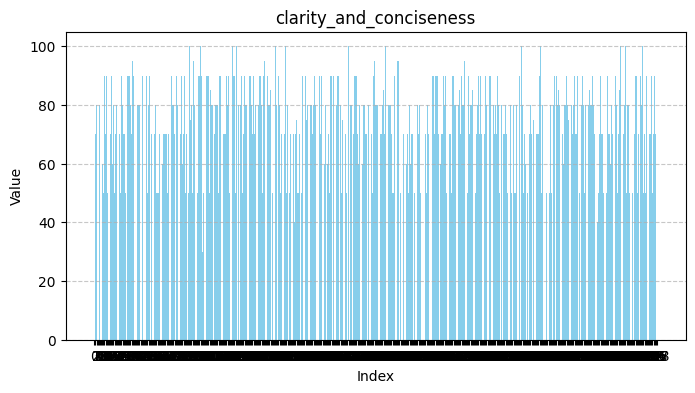

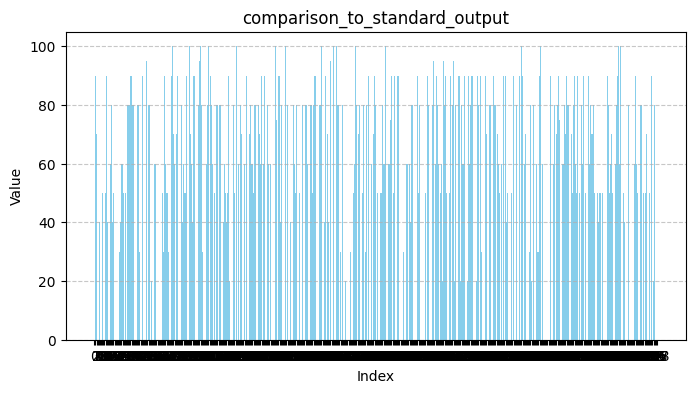

In [24]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt

with open('../ft_data/judgement_v3.json', 'r', encoding='utf-8') as file:
    judge = json.load(file)

categories = ["question_understanding",
                "content_consistency",
                "coverage_of_information",
                "logical_coherence_and_reasonableness",
                "clarity_and_conciseness",
                "comparison_to_standard_output"]

matrix = np.zeros((6, 499))

data_row1 = []
data_row2 = []
data_row3 = []
data_row4 = []
data_row5 = []
data_row6 = []

for idx, line in enumerate(judge):
    data_row1.append(line["judgement"]["scores"]["question_understanding"])
    data_row2.append(line["judgement"]["scores"]["content_consistency"])
    data_row3.append(line["judgement"]["scores"]["coverage_of_information"])
    data_row4.append(line["judgement"]["scores"]["logical_coherence_and_reasonableness"])
    data_row5.append(line["judgement"]["scores"]["clarity_and_conciseness"])
    data_row6.append(line["judgement"]["scores"]["comparison_to_standard_output"])

matrix[0, :] = data_row1
matrix[1, :] = data_row2
matrix[2, :] = data_row3
matrix[3, :] = data_row4
matrix[4, :] = data_row5
matrix[5, :] = data_row6

np.random.seed(42)  # 固定随机种子，保证结果可复现
# 遍历每一行并绘制柱状图
for i, row in enumerate(matrix):
    plt.figure(figsize=(8, 4))  # 创建一个新图
    plt.bar(range(len(row)), row, color='skyblue')  # 绘制柱状图
    plt.title(categories[i])  # 设置标题
    plt.xlabel('Index')  # 设置 x 轴标签
    plt.ylabel('Value')  # 设置 y 轴标签
    plt.xticks(range(len(row)))  # 设置 x 轴刻度
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
    plt.show()  # 显示图形

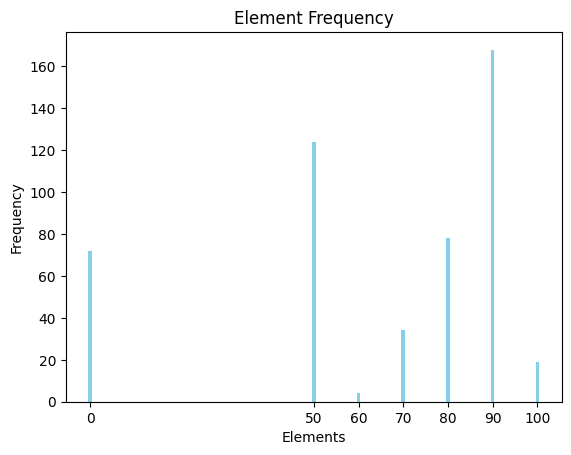

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

# 假设有一个长列表
data = data_row1

# 使用 Counter 统计每个元素的出现次数
counter = Counter(data)

# 获取元素和对应的出现次数
elements = list(counter.keys())
counts = list(counter.values())

# 绘制柱状图
plt.bar(elements, counts, color='skyblue')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Element Frequency')
plt.xticks(elements)  # 确保 x 轴刻度显示所有元素
plt.show()

In [3]:
import json

def remove_content_before_double_newline(s):
    # 查找第一个连续两个 '\n' 的位置
    index = s.find('\n\n')
    
    if index != -1:
        # 从两个 '\n' 之后开始截取字符串
        return s[index + 2:]
    else:
        # 如果没有找到连续两个 '\n'，返回原字符串
        return s

datas =  []
with open('法律/law_logic2predicates_v4.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)
        predicates = data['predicates']
        data['predicates'] = remove_content_before_double_newline(predicates)
        # 打印或处理数据
        datas.append(data)

with open('法律/law_logic2predicates_v4.json', 'w', encoding='utf-8') as f:
    json.dump(datas, f, ensure_ascii=False, indent=4)

In [2]:
def remove_content_before_double_newline(s):
    # 查找第一个连续两个 '\n' 的位置
    index = s.find('\n\n')
    
    if index != -1:
        # 从两个 '\n' 之后开始截取字符串
        return s[index + 2:]
    else:
        # 如果没有找到连续两个 '\n'，返回原字符串
        return s

# 示例字符串
text = "这是第一行\n这是第二行\n\n这是第三行，保留的内容"

# 调用函数
result = remove_content_before_double_newline(text)

print(result)

这是第三行，保留的内容


In [2]:
import json
import re

datas =  []
count = 0
with open('法律/DISC-Law-SFT-Triplet-QA-released.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)

        if(len(data["reference"]) == 1):
            match = re.search(r"(.*)(<问题>)(.*)", data["input"], re.DOTALL)
            if match:
                before_question = match.group(1).strip()
                question_part = match.group(3).strip()
                # print("问题前的内容：")
                # print(before_question)
                # print("\n问题部分：")
                # print(question_part)
            else:
                print("未找到<问题>标记")
            # 打印或处理数据
            sentence = {
                "instruction": question_part,
                "input": before_question,
                "output": data["output"]
            }
            datas.append(sentence)

            count += 1

        if(count >= 100):
            break

with open('法律/DISC_QA_100.json', 'w', encoding='utf-8') as f:
    json.dump(datas, f, ensure_ascii=False, indent=4)

In [4]:
import json

datas = []
with open('法律/根据规则直接生成_v1.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)

        try:
            generation = json.loads(data["generation"])
            question = generation["question"]
            answer = generation["answer"]

            sample = {
                "input": data["rule"],
                "instruction": question,
                "output": answer
            }
            datas.append(sample)
        except Exception as e:
            print(data["id"])

with open('法律/根据规则直接生成_train_v1.json', 'w', encoding='utf-8') as f:
    json.dump(datas, f, ensure_ascii=False, indent=4) 

In [13]:
print(len(datas))

2822


In [1]:
import json
import jsonlines
import re

datas = []
ori = []
# with open('法律/DISC-Law-SFT-Triplet-released.jsonl', 'r', encoding='utf-8') as file:
#     # 逐行读取
#     for line in file:
#         # 去掉行尾的换行符
#         line = line.strip()
#         # 解析 JSON 数据
#         data = json.loads(line)
#         # 打印或处理数据
#         ori.append(data)

with open('法律/根据规则直接生成_v1.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)
        
        # try:
        #     instruction = data["instruction"]
        #     # 1. 替换换行分隔的JSON对象为逗号分隔
        #     formatted_data = re.sub(r'}\s*{', '},{', instruction)

        #     # 2. 包裹成JSON数组格式
        #     formatted_data = f'[{formatted_data}]'

        #     # 3. 解析为Python列表
        #     data_list = json.loads(formatted_data)
        #     for instance in data_list:
        #         # 4. 将每个实例添加到数据集中
        #         sample = {
        #             "input": data["rule"],
        #             "instruction": instance["instruction"],
        #             "output": instance["output"]
        #         }
        #         datas.append(sample)
        # except Exception as e:
        #     print(data["id"], data["number"])

        # 1. 正则匹配所有被 {} 包裹的内容（允许跨行）
        instruction = data["instruction"]
        pattern = re.compile(r'\{.*?\}', re.DOTALL)
        matches = pattern.findall(instruction)

        # 2. 清理数据并解析JSON
        data_list = []
        for match in matches:
            # 去除可能存在的干扰字符（如 ```json）
            cleaned_match = re.sub(r'```json\s*', '', match)
            try:
                data1 = json.loads(cleaned_match)
                data_list.append(data1)
            except json.JSONDecodeError:
                print(f"解析失败的内容: {cleaned_match}")
        for instance in data_list:
            # 4. 将每个实例添加到数据集中
            # id = data["id"]
            # number = data["number"]
            sample = {
                "input": instance["rule"],
                "instruction": instance["instruction"],
                "output": instance["output"]
            }
            datas.append(sample)

with open('法律/law_instruction_zhijie_v1.json', 'w', encoding='utf-8') as f:
    json.dump(datas, f, ensure_ascii=False, indent=4)

KeyError: 'instruction'

## RJUA

In [5]:
import json
import jsonlines
import re

data_all = []
with open('RJUA/RJUA_train.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)
        text = data["context"]

        # 使用正则表达式匹配所有以 "Context：" 开头的段落
        pattern = r'Context：.*?(?=\nContext：|$)'

        # 查找所有匹配的内容
        contexts = re.findall(pattern, text, re.DOTALL)

        datas = []
        # 输出结果
        for i, context in enumerate(contexts, 1):
            datas.append(context.strip())
        
        sample = {
            "id": data["id"],
            "contexts": datas,
        }
        data_all.append(sample)

with open('RJUA/RJUA_train_json.json', 'w', encoding='utf-8') as f:
    json.dump(data_all, f, ensure_ascii=False, indent=4)

In [22]:
import json
import jsonlines

datas = []
with open('RJUA/RJUA_nl2logic_v4.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)

        try:
            output = json.loads(data["answer"])
            dict = {
                "ori_id": data["ori_id"],
                "number": data["number"],
                "input": {
                    "rule": data["rule"].replace("Context：", ""),
                    "predicates": output["predicates"],
                    "logicexpression": output["logicexpression"],
                }
            }
            datas.append(dict)
        except Exception as e:
            print(data["ori_id"], data["number"])

with open("RJUA/RJUA_nl2logic_v5.json", 'w', encoding='utf-8') as f:
    json.dump(datas, f, ensure_ascii=False, indent=4)


        

1050 2
1816 5
1999 13
1048 3
774 0
1819 4
1122 11
1069 9
496 8
220 9
1220 20
1854 6
873 0
1451 1
267 0
582 0
1467 17
467 5
1113 2


In [25]:
import json
import jsonlines

datas = []
with open('RJUA/RJUA_predicates2nl_v1.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        data = json.loads(line)

        try:
            text = data["natural_language"]

            # 使用正则表达式提取每个序号后面的内容
            pattern = r'\d+\.\s*(.*?)(?=\n\d+\.|$)'

            # 查找所有匹配的内容
            matches = re.findall(pattern, text, re.DOTALL)

            # 将匹配的内容放入列表中
            result = [match.strip() for match in matches]
            
            dict = {
                "ori_id": data["id"],
                "number": data["number"],
                "rule": data["rule"],
                "result": result
            }
            datas.append(dict)
        except Exception as e:
            print(data["ori_id"], data["number"])

with open("RJUA/RJUA_predicates2nl_v2.json", 'w', encoding='utf-8') as f:
    json.dump(datas, f, ensure_ascii=False, indent=4)

In [51]:
import json
import random
import re


def extract_json(text):
    # 使用正则表达式匹配所有 {...} 结构的文本块
    pattern = r'\{.*?\}'  # 非贪婪匹配
    matches = re.findall(pattern, text, re.DOTALL)  # re.DOTALL使.能匹配换行符

    # 转换为标准JSON数组
    result = []
    for match in matches:
        try:
            # 清理空白字符并解析
            cleaned_match = re.sub(r'\s+', ' ', match).strip()  # 压缩多余空格
            result.append(json.loads(cleaned_match))
        except json.JSONDecodeError as e:
            print(f"解析失败: {match}\n错误信息: {e}")

    return result


data = []
with open('RJUA/RJUA_nl2instruction_v1.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        datas = json.loads(line)

        instruction = extract_json(datas["instruction"])
        for ins in instruction:
            rule = datas["rule"]
            dict = {
                "input": rule,
                "instruction": ins["instruction"],
                "output": ins["output"]
            }
            data.append(dict)

random.seed(42)  # 设置随机种子以确保可重复性
random.shuffle(data)  # 随机打乱数据
train_size = int(0.8 * len(data))  # 80% 用于训练   
test_size = len(data) - train_size  # 20% 用于测试
print(len(data))

train_data = data[:train_size]  # 前 80% 数据作为训练集
test_data = data[train_size:]  # 后 20% 数据作为测试集

with open("../ft_data/RJUA/train_v1.json", 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

with open("../ft_data/RJUA/test_v1.json", 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)

2053


In [ ]:
import json
import random

data = []
with open('RJUA/RJUA_nl2instruction_v1.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        datas = json.loads(line)
        try:
            instruction = json.loads(datas["instruction"])
        except Exception as e:
            print(datas["id"], datas["number"])
            continue

1735 1
1735 1
1735 1
1735 1
1735 1
1735 1
1735 1
1735 1
1050 8
1050 8
1050 13
1050 13
1050 13
1050 13
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1050 14
1238 3
1238 3
1462 1
1462 11
2119 2
2119 2
2119 2
2119 2
2119 2
2119 3
2119 3
1150 1
1150 1
1150 1
1150 1
1150 13
1150 13
1150 14
1150 14
1150 14
874 2
874 2
874 2
874 3
874 3
874 3
874 3
874 3
874 4
874 4
874 4
874 4
874 4
874 4
874 4
874 4
874 8
635 1
635 1
635 1
635 1
635 1
635 1
635 1
635 1
635 1
635 1


In [52]:
import json
import random

data = []
with open('RJUA/根据规则直接生成_v1.jsonl', 'r', encoding='utf-8') as file:
    # 逐行读取
    for line in file:
        # 去掉行尾的换行符
        line = line.strip()
        # 解析 JSON 数据
        datas = json.loads(line)

        input = datas["rule"]
        instruction = json.loads(datas["generatrion"])["question"]
        output = json.loads(datas["generatrion"])["answer"]

        dict = {
            "input": input,
            "instruction": instruction,
            "output": output
        }
        data.append(dict)

with open("../ft_data/RJUA/zhijie_train_v1.json", 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [4]:
import json

with open("DF/rules1.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

sens = []
for idx, i in enumerate(data):
    sen = {
        "id": f"{idx}&1",
        "rule": i["rule_text"],
    }
    sens.append(sen)

with open(f"DF/rules1_type.json", 'w', encoding='utf-8') as f:
        json.dump(sens, f, ensure_ascii=False, indent=4)

In [3]:
import json

with open("DF/dev.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

sens = []
for idx, i in enumerate(data):
    sen = {
        "instruction": "根据问题回答单项选择题，你应该只输出代表正确答案的选项大写字母." + i["question_text"],
        "input": "",
        "output": i["answer"]
    }
    sens.append(sen)

with open(f"DF/dev_alpaca.json", 'w', encoding='utf-8') as f:
        json.dump(sens, f, ensure_ascii=False, indent=4)